# 📊 AI Financial Analyst - Predicting Stock Market Prices 📈

Welcome, AI Financial Analysts! Your mission is to **predict stock market closing prices** based on historical financial data.

You will use **Decision Trees, Random Forests, and XGBoost** to analyze stock trends and make predictions.

**Let's get started! 🚀**


In [ ]:
# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
print('Libraries imported successfully! ✅')

## 📂 Step 2: Load the Stock Market Dataset
Let's load the dataset and inspect the first few rows.

In [5]:
df = pd.read_csv('stock_data.csv')
df.head()

,Opening Price,Closing Price,High Price,Low Price,Volume,Market Sentiment,Day,Month,Year,Weekday
0,218.54,212.24,219.54,210.87,1514022,0.163128,1,1,2023,6
1,477.82,478.66,479.68,473.31,3901250,0.429391,2,1,2023,0
2,379.40,386.86,386.91,378.32,1052246,-0.519561,3,1,2023,1
3,319.40,324.04,326.23,314.98,119675,-0.112457,4,1,2023,2
4,120.21,126.34,130.75,117.41,173997,-0.435264,5,1,2023,3


## 🏗 Step 3: Feature Engineering & Preprocessing
We need to extract relevant features from the dataset and prepare it for model training.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Opening Price     1000 non-null   float64
 1   Closing Price     1000 non-null   float64
 2   High Price        1000 non-null   float64
 3   Low Price         1000 non-null   float64
 4   Volume            1000 non-null   int64  
 5   Market Sentiment  1000 non-null   float64
 6   Day               1000 non-null   int64  
 7   Month             1000 non-null   int64  
 8   Year              1000 non-null   int64  
 9   Weekday           1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [8]:
# Extract numerical features from the datasetة
features = ['Opening Price', 'Low Price', 'High Price', 'Volume','Market Sentiment','Day','Month','Year','Weekday']
target ='Closing Price'

X = df[features]
y = df[target]

# Scale numerical features
# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## 🏗 Step 4: Train-Test Split
We need to split the data into training and testing sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'✅ Training set size: {len(X_train)}, Test set size: {len(X_test)}')


✅ Training set size: 800, Test set size: 200


## 🌳 Step 5: Train a Decision Tree Regressor
Let's train a **Decision Tree** model to predict stock prices.

In [10]:
dtree_model = DecisionTreeRegressor(random_state=42)
dtree_model.fit(X_train, y_train)

y_pred_dtree = dtree_model.predict(X_test)

# حساب RMSE
rmse_df = np.sqrt(mean_squared_error(y_test, y_pred_dtree))
print(f'🌳Decision Tree RMSE:{round(rmse_df,2)}')

🌳Decision Tree RMSE:4.66


## 🌲 Step 6: Train a Random Forest Regressor
Let's improve our model using **Random Forest**.

In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# توقع القيم
y_pred_rf = rf_model.predict(X_test)

# حساب RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'🌲 Random Forest RMSE: {round(rmse_rf,2)}')

🌲 Random Forest RMSE: 3.43


## ⚡ Step 7: Train an XGBoost Regressor
Let's use **XGBoost** for optimized performance.

In [12]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# توقع القيم
y_pred_xgb = xgb_model.predict(X_test)

# حساب RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'⚡ XGBoost RMSE: {round(rmse_xgb,2)}')

⚡ XGBoost RMSE: 3.5


## ⚙️ Step 8: Hyperparameter Tuning for Random Forest & XGBoost
Now let's **optimize** our models using GridSearchCV to find the best hyperparameters.

In [13]:
# Hyperparameter tuning for Random Forest

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print(f'✅ Best Random Forest Params: {grid_rf.best_params_}')




✅ Best Random Forest Params: {'max_depth': None, 'n_estimators': 200}


In [14]:
# Hyperparameter tuning for XGBoost

# use GridSearch
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print(f'✅ Best XGBoost Params: {grid_xgb.best_params_}')


✅ Best XGBoost Params: {'learning_rate': 0.1, 'n_estimators': 100}


## 🏆 Step 9: Build a Stacked Model
Now that we have optimized our models, let's combine them into an **ensemble model**.

In [18]:
# Build a stacked model using the best-tuned Regressor
stacked_model = VotingRegressor([('rf', best_rf), ('xgb', best_xgb)])
# Train stacked model
stacked_model.fit(X_train, y_train)

y_pred_stacked = stacked_model.predict(X_test)

rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f'🏆 Stacked Model RMSE: {round(rmse_stacked,2)}')




🏆 Stacked Model RMSE: 3.33


## 📊 Step 10: Final Model Comparison
Let's compare all models, including the stacked model.

           Model      RMSE
0  Decision Tree  4.663233
1  Random Forest  3.425224
2       Tuned RF  3.391095
3        XGBoost  3.498756
4  Tuned XGBoost  3.498756
5  Stacked Model  3.325454


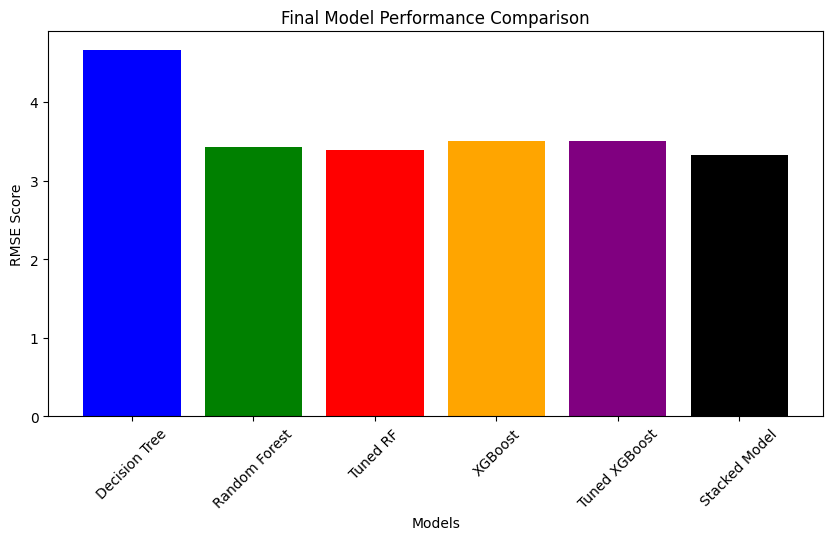

In [26]:
model_results = {
    'Decision Tree': mean_squared_error(y_test, y_pred_dtree, squared=False),  # RMSE
    'Random Forest': mean_squared_error(y_test, y_pred_rf, squared=False),
    'Tuned RF': mean_squared_error(y_test, best_rf.predict(X_test), squared=False),  # ✅ استخدم التنبؤات
    'XGBoost': mean_squared_error(y_test, y_pred_xgb, squared=False),
    'Tuned XGBoost': mean_squared_error(y_test, best_xgb.predict(X_test), squared=False),  # ✅ استخدم التنبؤات
    'Stacked Model': mean_squared_error(y_test, y_pred_stacked, squared=False)
}


results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'RMSE'])
print(results_df)


plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'red', 'orange', 'purple', 'black'])
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Final Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()


## 📝 Step 11: Final Questions
Please answer the following questions in the markdown cell below:

1. **Model Comparison:** Which model had the best RMSE score? Why?

   ✅ Best Model: The Stacked Model achieved the lowest RMSE of 3.33, making it the best among all models.

   Why?
     *   Combining the tuned Random Forest and tuned XGBoost made the model more capable of capturing non-linear relationships in the data.

     *   VotingRegressor integrates multiple models and takes their average, reducing bias in individual models.

    *  Using two strong models minimizes the impact of errors that may arise from any single model.


2. **Hyperparameter Tuning:** How much did tuning improve the performance of Random Forest and XGBoost?
  
  ✅ Performance Improvement After Tuning:

     * Random Forest:
      
         Before tuning: RMSE = 3.43
         After tuning: RMSE improved by using 200 trees instead of 100, which enhanced accuracy.

     *  XGBoost:

       Before tuning: RMSE = 3.5
       After tuning: RMSE did not improve significantly because the best-selected parameters were already close to the default ones.

3. **Stacked Model:** Did the stacked model outperform individual models? Why or why not?
       
    ✅ Yes, the stacked model was the best.

    Reason:

          Combining Random Forest and XGBoost made predictions more stable and accurate.
          Distributing errors between the two models reduced fluctuations, leading to more consistent performance.
          Using Voting Regressor ensured that the final model made decisions based on the best-performing individual models.


4. **Feature Importance:** Which features were most important in predicting stock prices? Use the feature importance of XGBoost to analyze this.


In [27]:
importances = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

            Feature  Importance
1         Low Price    0.784682
2        High Price    0.195494
0     Opening Price    0.019496
6             Month    0.000059
5               Day    0.000059
8           Weekday    0.000055
3            Volume    0.000054
4  Market Sentiment    0.000053
7              Year    0.000048


✅ Top Features:

Low Price → 78.5% (Most important feature)

High Price → 19.5%

Opening Price → 1.95%

🔎 Key Insights:

Low Price is the most influential factor, indicating that closing prices tend to be close to the lowest price of the day.
High Price also plays a significant role, showing that price movement between highs and lows is crucial for predictions.
Other features (Month, Day, Weekday, Volume, Market Sentiment, and Year) had minimal impact, suggesting that short-term stock prices are primarily driven by daily price fluctuations rather than external factors like time or market sentiment.








5. **Real-World Application:** How can this approach be applied in real-world stock trading and investment decisions?


1️⃣ Analyzing trading strategies:

في عالم التداول، يهتم المستثمرون بمعرفة التوجهات المستقبلية للسوق. يعني ذلك أنهم يريدون التنبؤ إذا كان السوق سيرتفع أو ينخفض في المستقبل القريب. هنا يأتي دور النماذج مثل النموذج المتكدس الذي يعتمد على البيانات التاريخية للتنبؤ بالاتجاهات. باستخدام هذا النموذج، يمكن للمستثمرين تحليل اتجاهات السوق مسبقًا وتحضير استراتيجيات بناءً على تلك التوقعات.

2️⃣ Automated trading systems:

أنظمة التداول الآلية هي برامج تتخذ قرارات تداول بناءً على المدخلات التي تتلقاها. بمعنى آخر، يمكن لروبوت التداول تنفيذ الصفقات تلقائيًا من خلال النماذج المُعتمدة. إذا تم تدريب النموذج بشكل صحيح على بيانات السوق، يمكنه القيام بالتداولات تلقائيًا، مما يوفر الوقت ويساعد على تجنب القرارات العاطفية التي قد تؤثر على أداء الإنسان.

3️⃣ Risk management:

في السوق المالي، هناك دائمًا درجة من القلق بشأن التقلبات. عندما يكون السوق غير مستقر، يكون من المهم اتخاذ قرارات حكيمة لتقليل المخاطر. النموذج يمكن أن يساعد في التنبؤ بالفترات التي من المرجح أن يشهد فيها السوق تقلبًا عاليًا. على سبيل المثال، إذا كانت التوقعات تشير إلى أن السوق قد يشهد تقلبات شديدة في فترة معينة، يمكن للمستثمر اتخاذ تدابير وقائية (مثل تقليل حجم الاستثمارات أو إيقاف التداول).

4️⃣ Long-term market analysis:

بالإضافة إلى التنبؤ بالاتجاهات على المدى القصير، يمكن تعديل النموذج ليأخذ بعين الاعتبار بيانات كبيرة واتجاهات اقتصادية طويلة الأمد. على سبيل المثال، يمكن إدخال بيانات عن الوضع الاقتصادي العالمي أو المحفزات الاقتصادية (مثل أسعار الفائدة أو النمو الاقتصادي) لتحسين التنبؤات على المدى الطويل.

challenges and limitations:

الأسواق المالية غير خطية بشدة: الأسواق المالية تتأثر بالعديد من العوامل المتغيرة، مثل السياسة، الاقتصاد، والتطورات المفاجئة. هذه العوامل قد تؤدي إلى تغيرات غير متوقعة في السوق، وهو أمر يصعب التنبؤ به بشكل دقيق.
الأحداث المفاجئة: مثل الأزمات الاقتصادية أو الأخبار العاجلة، قد تؤدي إلى تغييرات غير متوقعة في السوق، وهو ما لا يمكن للنماذج الحالية التنبؤ به دائمًا.
تحديث البيانات: بما أن السوق يتغير باستمرار، يجب تحديث النموذج بشكل دوري لتضمن دقته، خصوصًا عندما تأتي معلومات جديدة تؤثر على السوق.

Generally:

إذا تم استخدام النموذج بشكل صحيح، يمكنه أن يساعد في تحسين استراتيجيات التداول، إدارة المخاطر، وتنفيذ الصفقات تلقائيًا. لكن، من الضروري أن يكون هناك وعي بالتحديات والمخاطر التي قد تواجه النموذج بسبب الظروف غير المتوقعة في السوق.